In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
def resample(dataframe,column, period):
    dataframe = dataframe.set_index(column).resample(period).ffill().reset_index()
    return dataframe

The first step of any Jupytr/Python project is importing the libraries you will be using to conduct your analysis. These four libraries are among the most commonly used Python libraries. We will be using PANDAS to create easy to manipulate dataframes, NUMPY for applying and arithmetic functinos, and seaborn + MatPlotLib for creating visualizations

<hr>

# Contents



1. [Overview](#1.-Overview)

    1.1 [Background](#1.1-Background)
    
    1.2 [Data](#1.2-Data)
    
    1.3 [Objectives](#1.3-Objectives)
    
2. [Cleaning](#2.-Cleaning)

    2.1 [US Population](#2.1-US-Population)
    
    2.2 [Alcohol Deaths](#2.2-Alcohol-Deaths)
    
    2.3 [Alcohol Sales](#2.3-Alcohol-Sales)
    
    2.4 [Drug Deaths](#2.4-Drug-Deaths)
    
    2.5 [Homicides](#2.5-Homicides)
    
    2.6 [Suicide Rate](#2.6-Suicide-Rate)
    
    2.7 [Unemployment](#2.7-Unemployment)
    
    2.8 [Inflation](#2.8-Inflation)
    
    2.9 [GDP](#2.9-GDP)
    
    2.10 [H1N1](#2.10-H1N1)
    
    2.11 [COVID](#2.11-COVID)
   
    
3. [Merging](#3.-Merging)
    
<hr>
    
    


# 1. Overview



## 1.1 Background
This project is an adaptation of the project Tony Robol completed in DataJam handbook(available on PGH Dataworks website). My version of the project will be analazying the relationship between mental health and economic factors in relation to the H1N1 and COVID 19 pandemic. My central research question is "How do pandemics affect american individual and long term?". This question will also help todetermine if the H1N1 "pandemic" truly qualifies as pandemic after the effect COVID has had on the world. 

## 1.2 Data
The data for this project is cited in the links below: 
- Unemployment Rate
    - Source: https://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm.
    - Copy and paste into excel file. Will then convert to pdf
- Suicide Rate 
    - Source: https://www.cdc.gov/nchs/data/databriefs/db241_table.pdf#1
    - Had to save the data table pdf to my desktop then use https://www.cleverpdf.com/ to convert it to a excel file. Include a note about never using manual data entry. IMO,  if you are thinking about entering the data manually you should switch your approach
    - This data is yearly, I want the data to be monthly, I will split the data up monthly through some sort of plotting process 
    https://www.cdc.gov/nchs/data/databriefs/db433-tables.pdf#1
- Homicide Rate 
    - Source: https://wonder.cdc.gov/controller/datarequest/D76;jsessionid=22B4DBCFDC0FE213B87A96923C50 
    - Deaths are just the total number of homicides in the US. Only totals. Need to get the US Population each year/month to caca
- US population
    - Source: https://www.multpl.com/united-states-population/table/by-month
    - Data collected from the US census bureau 
- H1N1 Data(2009)
    - Source: https://www.cdc.gov/h1n1flu/estimates_2009_h1n1.htm
    -  https://www.kaggle.com/datasets/arashnic/flu-data
    - From April 12, 2009 to April 10, 2010, CDC estimated there were 60.8 million cases (range: 43.3-89.3 million), 274,304 hospitalizations (range: 195,086-402,719), and 12,469 deaths (range: 8868-18,306) in the United States due to the (H1N1)pdm09 virus.
    
- Drug data
    - Source: https://wonder.cdc.gov/controller/datarequest/D76;jsessionid=22B4DBCFDC0FE213B87A96923C50


## 1.3 Objectives
In this notebook I hope to demonstrate best practices for clearning and merging datasets. I will use a variety og methods as to show you how similar tasks can be done in different ways. Throughout the notebook there will be comments about what the code actually does/means. There will. also be notes describing my approach to handling problems. Pay special tips to these anecdotes because using a logical approach is the most potent form of problem solving. 
<hr>


# 2. Cleaning

In this section I will be demonstrating my process of cleaning datasets with Pyhton. Keep in mind that there are many alternate approaches to the methods I use; however, I will demonstarte what I consider to be bnest practice. 


## 2.1 US Population

In [3]:
population = pd.read_excel("/Users/natemcdowell/Desktop/crf/datasets/us_pop.xlsx")

In the cell above we are using PANDAS to create our first dataframe. The function *pd.read* can be applied to many different types of files such as csv, json, ______ by using their respective functions. ____. 

In [4]:
population

,Date,Value
0,2022-05-01,332.64 million
1,2022-04-01,332.60 million
2,2022-03-01,332.54 million
3,2022-02-01,332.47 million
4,2022-01-01,332.40 million
...,...,...
471,1904-07-01,82.17 million
472,1903-07-01,80.63 million
473,1902-07-01,79.16 million
474,1901-07-01,77.58 million


to view the dataframe you just created, simply type in the name of the dataset. I usually name my datasets "df" (short for dataframe); however, you can name yours whatever you want. If your dataframe consisted of heart disease data you might name your dataframe "heart".

In [5]:
population = population.rename(columns = {'Date':'date','Value':'pop'})

Before working further with your data you should decide on how you want to name your columns. I choose to always name my columns with lowercase letters with no spaces(I use underscores in place of spaces). 

In [6]:
population.dtypes

date    datetime64[ns]
pop             object
dtype: object

Using the *.dtypes* command shows you the data type for each dataframe column. In this case, we have the *date* column in datetime format(perfect) and the *pop* column in object format, not ideal. We want to convert this column into a numerical datatype like int or float. To do this we have to get rid of the "million" that ends each data point.

In [7]:
population["pop"].str.split(" ", n = 1, expand = True)

,0,1
0,332.64,million
1,332.60,million
2,332.54,million
3,332.47,million
4,332.40,million
...,...,...
471,82.17,million
472,80.63,million
473,79.16,million
474,77.58,million


In [8]:
test = population["pop"].str.split(" ", n = 1, expand = True)

This function, *str.split* can be used to split a string(aka object) at any character specficied within first parameter. In my case I want to split on the space between the number and the word million. I will first set my function equal to *test*. This will save the split reseults to a new dataframe instead of creating changes to your current dataframe. Then I will set what column i want to split, followed by str.split. The first parameter will be the character to split on *" "*, the second parameter you will set to *n = 1*, to return all splits, and the third parameter will be set to *expand = True* to return the split as a dataframe. 

In [9]:
population['us_pop'] = test[0].astype(float)

We will now assign the value of the *test* dataframe column 0 to a new column in our real dataframe. We add the function *.astype* to to this statement to input the number as a float. 

In [10]:
population['us_pop'] = population["us_pop"] *1000000

Since the column was expressed in the million decimal for we want to transform the value to is proper form. This can be done by multiplying the number by 1000000 to move the decimal places the proper amount of spaces. 

In [11]:
population.head()

,date,pop,us_pop
0,2022-05-01,332.64 million,332640000.0
1,2022-04-01,332.60 million,332600000.0
2,2022-03-01,332.54 million,332540000.0
3,2022-02-01,332.47 million,332470000.0
4,2022-01-01,332.40 million,332400000.0


In [12]:
population =population.drop(columns = ['pop'])

We can now drop the old column containing the data in an improper form.

[Text(0.5, 1.0, 'US  POP Over Time')]

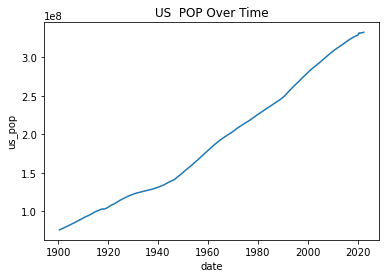

In [13]:
sns.lineplot(x = "date", y = "us_pop",
             data = population,markers = True).set(title='US  POP Over Time')

At the top of this notebook we imported the seaborn library as sns. We did this so we can call seaborn in a shorthand way, simply by typing sns. Seaborn has many different types of figures, but for this notebook we are going to be using the lineplot figure frequently. To create a lineplot you will set the x and y values to the colmuns that you want on the x and y axis. Next you will let seaborn where the data is located, *ex. data = df*. I then set markers to True ___ , as well as set the title to "US Pop Over Time". 

In [14]:
#population  = df.copy()

Now we can save the finished dataframe with a unique name so that we can work with it later. 

## 2.2 Alcohol Deaths




In [15]:
alc_d = pd.read_excel("/Users/natemcdowell/Desktop/crf/datasets/alcohol_death.xlsx")

In [16]:
alc_d.shape

(301, 8)

this command shows me what the structure of the data, how much data I will be looking at. This dataset is reported to be 301 rows and 8 columns

In [17]:
alc_d.head()

,Notes,Drug/Alcohol Induced,Drug/Alcohol Induced Code,Month,Month Code,Deaths,Population,Crude Rate
0,NaN,Alcohol-induced causes,A,"Jan., 1999",1999/01,1783.0,Not Applicable,Not Applicable
1,NaN,Alcohol-induced causes,A,"Feb., 1999",1999/02,1609.0,Not Applicable,Not Applicable
2,NaN,Alcohol-induced causes,A,"Mar., 1999",1999/03,1723.0,Not Applicable,Not Applicable
3,NaN,Alcohol-induced causes,A,"Apr., 1999",1999/04,1507.0,Not Applicable,Not Applicable
4,NaN,Alcohol-induced causes,A,"May, 1999",1999/05,1583.0,Not Applicable,Not Applicable


the head command, by default shows me the first 5 rows of the dataset. If I want, I can enter any number up to 50 for a custom amount of rows to be displayed.

<AxesSubplot:>

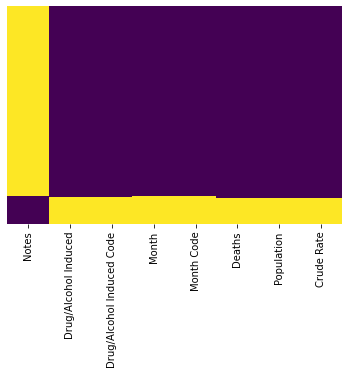

In [18]:
sns.heatmap(alc_d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As you can see above, the "Notes" column is filled with NaN values. The yellow sections of the heatmap below represent the instances of the NaN values 

In [19]:
alc_d = alc_d.drop(columns = ['Notes'])

since the notes column contains so many NaN values I chose to drop it. Everyytimme that you want to make a permanent change to a dataframe in pandas you have to redefine it. This is why I set "df =" to the change I want to make. If I don't do this the command will simply display the type of effect it *would* have but it would not actually make that change to the data. 

<AxesSubplot:>

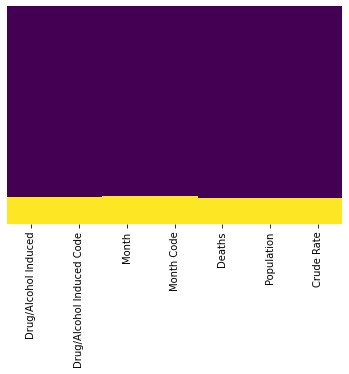

In [20]:
sns.heatmap(alc_d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The new dataframe after wthe drop of notes:

In [21]:
alc_d = alc_d.dropna()

This command will drop all rows containing a NaN value. Since all of the NaN's are isolated to the bottom,not dsispered through the dataframe, dropping them won't create and major change. 

In [22]:
alc_d

,Drug/Alcohol Induced,Drug/Alcohol Induced Code,Month,Month Code,Deaths,Population,Crude Rate
0,Alcohol-induced causes,A,"Jan., 1999",1999/01,1783.0,Not Applicable,Not Applicable
1,Alcohol-induced causes,A,"Feb., 1999",1999/02,1609.0,Not Applicable,Not Applicable
2,Alcohol-induced causes,A,"Mar., 1999",1999/03,1723.0,Not Applicable,Not Applicable
3,Alcohol-induced causes,A,"Apr., 1999",1999/04,1507.0,Not Applicable,Not Applicable
4,Alcohol-induced causes,A,"May, 1999",1999/05,1583.0,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...
259,Alcohol-induced causes,A,"Aug., 2020",2020/08,4362.0,Not Applicable,Not Applicable
260,Alcohol-induced causes,A,"Sep., 2020",2020/09,4226.0,Not Applicable,Not Applicable
261,Alcohol-induced causes,A,"Oct., 2020",2020/10,4359.0,Not Applicable,Not Applicable
262,Alcohol-induced causes,A,"Nov., 2020",2020/11,4427.0,Not Applicable,Not Applicable


In [23]:
alc_d['Drug/Alcohol Induced'].unique()

array(['Alcohol-induced causes'], dtype=object)

I will now use the .unique() command to determine what columns contain meaningful data. If a column is comprised of identical data, then it will not help me with any type of analysis, so it is best to drop it. 

In [24]:
alc_d['Drug/Alcohol Induced Code'].unique()

array(['A'], dtype=object)

In [25]:
alc_d['Population'].unique()

array(['Not Applicable'], dtype=object)

In [26]:
alc_d['Crude Rate'].unique()

array(['Not Applicable'], dtype=object)

In [27]:
alc_d = alc_d.drop(columns = ['Drug/Alcohol Induced','Drug/Alcohol Induced Code','Population','Crude Rate','Month'])
alc_d.head()

,Month Code,Deaths
0,1999/01,1783.0
1,1999/02,1609.0
2,1999/03,1723.0
3,1999/04,1507.0
4,1999/05,1583.0


In [28]:
alc_d = alc_d.rename(columns = {'Month Code':'date','Deaths':'alcohol_deaths'})

In [29]:
alc_d.head()

,date,alcohol_deaths
0,1999/01,1783.0
1,1999/02,1609.0
2,1999/03,1723.0
3,1999/04,1507.0
4,1999/05,1583.0


In [30]:
alc_d.dtypes

date               object
alcohol_deaths    float64
dtype: object

In [31]:
alc_d.date = pd.to_datetime(alc_d.date)

I need the date column to be in datetime format to create proper visualizations. Changing to the datetime type is a bit different than other datatypes because you need to call the pandas library. The command above demonstrates this method. 

In [32]:
alc_d.dtypes

date              datetime64[ns]
alcohol_deaths           float64
dtype: object

In [33]:
alc_d

,date,alcohol_deaths
0,1999-01-01,1783.0
1,1999-02-01,1609.0
2,1999-03-01,1723.0
3,1999-04-01,1507.0
4,1999-05-01,1583.0
...,...,...
259,2020-08-01,4362.0
260,2020-09-01,4226.0
261,2020-10-01,4359.0
262,2020-11-01,4427.0


[Text(0.5, 1.0, 'Alcohol Related Deaths Over Time')]

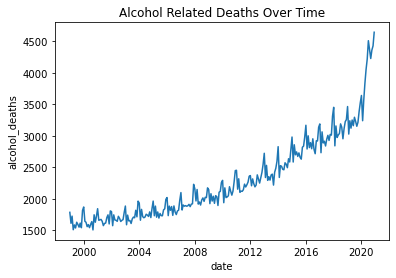

In [34]:
sns.lineplot(x = "date", y = "alcohol_deaths",
             data = alc_d,markers = True).set(title='Alcohol Related Deaths Over Time')

In [35]:
#alc_d = df.copy()


## 2.3 Alcohol Sales


In [36]:
alc_s =  pd.read_csv("/Users/natemcdowell/Desktop/crf/datasets/alcohol_sales.csv")

In [37]:
alc_s.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [38]:
alc_s.dtypes

DATE              object
S4248SM144NCEN     int64
dtype: object

In [39]:
alc_s = alc_s.rename(columns = {'DATE':'date','S4248SM144NCEN':'alcohol_sales'})

In [40]:
alc_s['date'] = pd.to_datetime(alc_s.date)

In [41]:
alc_s.head()

,date,alcohol_sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


[Text(0.5, 1.0, 'Alcohol Sales Over Time')]

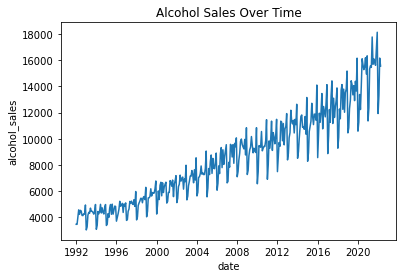

In [42]:
sns.lineplot(x = "date", y = "alcohol_sales",
             data = alc_s,markers = True).set(title='Alcohol Sales Over Time')

In [43]:
#alc_s =df.copy()

## 2.4 Drug Deaths

In [44]:
drug_d = pd.read_excel("/Users/natemcdowell/Desktop/crf/datasets/drug_deaths.xlsx")

In [45]:
drug_d

,Notes,Drug/Alcohol Induced,Drug/Alcohol Induced Code,Month,Month Code,Deaths,Population,Crude Rate
0,NaN,Drug-induced causes,D,"Jan., 1999",1999/01,1592.0,Not Applicable,Not Applicable
1,NaN,Drug-induced causes,D,"Feb., 1999",1999/02,1542.0,Not Applicable,Not Applicable
2,NaN,Drug-induced causes,D,"Mar., 1999",1999/03,1559.0,Not Applicable,Not Applicable
3,NaN,Drug-induced causes,D,"Apr., 1999",1999/04,1667.0,Not Applicable,Not Applicable
4,NaN,Drug-induced causes,D,"May, 1999",1999/05,1606.0,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...
296,"most notably R95, ""Sudden Infant Death Syndrom...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,interpreting these data. More information: htt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,5. Circumstances in California resulted in unu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,ill-defined and unspecified causes of mortalit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
drug_d = drug_d.drop(columns = ['Notes'])

In [47]:
drug_d = drug_d.dropna()

In [48]:
drug_d.head()

,Drug/Alcohol Induced,Drug/Alcohol Induced Code,Month,Month Code,Deaths,Population,Crude Rate
0,Drug-induced causes,D,"Jan., 1999",1999/01,1592.0,Not Applicable,Not Applicable
1,Drug-induced causes,D,"Feb., 1999",1999/02,1542.0,Not Applicable,Not Applicable
2,Drug-induced causes,D,"Mar., 1999",1999/03,1559.0,Not Applicable,Not Applicable
3,Drug-induced causes,D,"Apr., 1999",1999/04,1667.0,Not Applicable,Not Applicable
4,Drug-induced causes,D,"May, 1999",1999/05,1606.0,Not Applicable,Not Applicable


In [49]:
drug_d = drug_d.drop(columns = ['Drug/Alcohol Induced','Drug/Alcohol Induced Code','Population','Crude Rate'])
drug_d.head()

,Month,Month Code,Deaths
0,"Jan., 1999",1999/01,1592.0
1,"Feb., 1999",1999/02,1542.0
2,"Mar., 1999",1999/03,1559.0
3,"Apr., 1999",1999/04,1667.0
4,"May, 1999",1999/05,1606.0


I know that this data is from the same source as the alcohol deaths data so the columns are going to follow the same pattern of redundancy making it easier for me to deterimne what columns ot drop.

In [50]:
drug_d = drug_d.drop(columns = ['Month'])

In [51]:
drug_d = drug_d.rename(columns = {'Month Code':'date','Deaths':'drug_deaths'})

In [52]:
drug_d.head()

,date,drug_deaths
0,1999/01,1592.0
1,1999/02,1542.0
2,1999/03,1559.0
3,1999/04,1667.0
4,1999/05,1606.0


In [53]:
drug_d.date = pd.to_datetime(drug_d.date)

[Text(0.5, 1.0, 'Drug Related Deaths Over Time')]

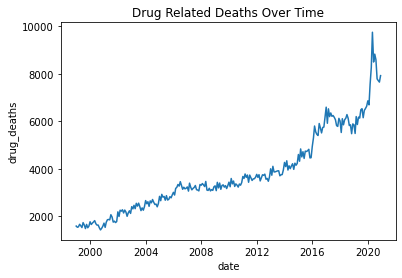

In [54]:
sns.lineplot(x = "date", y = "drug_deaths",
             data = drug_d,markers = True).set(title='Drug Related Deaths Over Time')

In [55]:
#drug_d = df.copy()

## 2.5 Homicides

In [56]:
hom = pd.read_excel("/Users/natemcdowell/Desktop/crf/datasets/homicide.xlsx")

This data is also from the CDC's WONDER api so the cleaning will be nearly identical to the previous dataset. 

In [57]:
hom.head()

,Notes,Injury Intent,Injury Intent Code,Month,Month Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,Homicide,3.0,"Jan., 2006",2006/01,1555.0,Not Applicable,Not Applicable,Not Applicable
1,NaN,Homicide,3.0,"Feb., 2006",2006/02,1223.0,Not Applicable,Not Applicable,Not Applicable
2,NaN,Homicide,3.0,"Mar., 2006",2006/03,1356.0,Not Applicable,Not Applicable,Not Applicable
3,NaN,Homicide,3.0,"Apr., 2006",2006/04,1526.0,Not Applicable,Not Applicable,Not Applicable
4,NaN,Homicide,3.0,"May, 2006",2006/05,1603.0,Not Applicable,Not Applicable,Not Applicable


In [58]:
hom = hom.drop(columns = ['Notes'])

In [59]:
hom = hom.dropna()

In [60]:
hom.head()

,Injury Intent,Injury Intent Code,Month,Month Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,Homicide,3.0,"Jan., 2006",2006/01,1555.0,Not Applicable,Not Applicable,Not Applicable
1,Homicide,3.0,"Feb., 2006",2006/02,1223.0,Not Applicable,Not Applicable,Not Applicable
2,Homicide,3.0,"Mar., 2006",2006/03,1356.0,Not Applicable,Not Applicable,Not Applicable
3,Homicide,3.0,"Apr., 2006",2006/04,1526.0,Not Applicable,Not Applicable,Not Applicable
4,Homicide,3.0,"May, 2006",2006/05,1603.0,Not Applicable,Not Applicable,Not Applicable


In [61]:
hom = hom.drop(columns = ['Injury Intent','Injury Intent Code','Population','Crude Rate','Age Adjusted Rate','Month'])

In [62]:
hom = hom.rename(columns = {'Month Code':'date','Deaths':'homicides'})

In [63]:
hom.date = pd.to_datetime(hom.date)

[Text(0.5, 1.0, 'Homicide Related Deaths Over Time')]

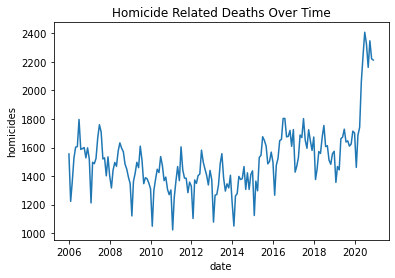

In [64]:
sns.lineplot(x = "date", y = "homicides",
             data = hom,markers = True).set(title='Homicide Related Deaths Over Time')

In [65]:
# it dips around every new year meaning that winter shows a decline while summer is an incline

In [66]:
#hom = df.copy()

## 2.6 Suicide Rate

In [67]:
sui = pd.read_excel("suicide_deaths.xlsx")

In [68]:
sui

,Notes,Year,Year Code,Month,Month Code,Injury Intent,Injury Intent Code,Deaths,Population,Crude Rate
0,NaN,1999.0,1999.0,"Jan., 1999",1999/01,Suicide,2.0,2498.0,Not Applicable,Not Applicable
1,Total,1999.0,1999.0,"Jan., 1999",1999/01,NaN,NaN,2498.0,Not Applicable,Not Applicable
2,NaN,1999.0,1999.0,"Feb., 1999",1999/02,Suicide,2.0,2296.0,Not Applicable,Not Applicable
3,Total,1999.0,1999.0,"Feb., 1999",1999/02,NaN,NaN,2296.0,Not Applicable,Not Applicable
4,NaN,1999.0,1999.0,"Mar., 1999",1999/03,Suicide,2.0,2465.0,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...
581,"most notably R95, ""Sudden Infant Death Syndrom...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,interpreting these data. More information: htt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,5. Circumstances in California resulted in unu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,ill-defined and unspecified causes of mortalit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
sui = sui[["Month Code","Deaths"]]

<AxesSubplot:>

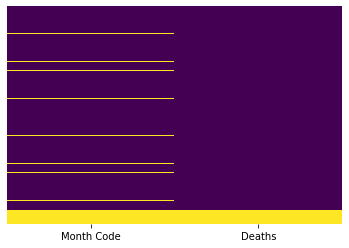

In [70]:
sns.heatmap(sui.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
sui = sui.dropna()

In [72]:
sui = sui.drop_duplicates()

In [73]:
sui

,Month Code,Deaths
0,1999/01,2498.0
2,1999/02,2296.0
4,1999/03,2465.0
6,1999/04,2475.0
8,1999/05,2542.0
...,...,...
539,2020/08,4040.0
541,2020/09,3908.0
543,2020/10,3781.0
545,2020/11,3704.0


In [74]:
sui = sui.reset_index(drop = True)

In [75]:
sui = sui.rename(columns = {"Month Code":"date", "Deaths":"suicide_deaths"})

In [76]:
sui.head()

,date,suicide_deaths
0,1999/01,2498.0
1,1999/02,2296.0
2,1999/03,2465.0
3,1999/04,2475.0
4,1999/05,2542.0


In [77]:
sui.date = pd.to_datetime(sui.date)

In [78]:
sui

,date,suicide_deaths
0,1999-01-01,2498.0
1,1999-02-01,2296.0
2,1999-03-01,2465.0
3,1999-04-01,2475.0
4,1999-05-01,2542.0
...,...,...
259,2020-08-01,4040.0
260,2020-09-01,3908.0
261,2020-10-01,3781.0
262,2020-11-01,3704.0


You can the effect that the resample function had on the data. 

## 2.7 Unemployment 

In [79]:
unemp = pd.read_excel("/Users/natemcdowell/Desktop/crf/datasets/unemployment_bls.xlsx")

In [80]:
unemp

,Month,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
0,2002-05-01,5.8,5.2,5.2,16.6,5.1,10.2,NaN,7.1
1,2002-06-01,5.8,5.3,5.1,16.7,5.1,10.5,NaN,7.4
2,2002-07-01,5.8,5.3,5.1,16.8,5.2,9.8,NaN,7.4
3,2002-08-01,5.7,5.2,5.0,17.0,5.1,9.8,NaN,7.5
4,2002-09-01,5.7,5.2,4.9,16.3,5.1,9.7,NaN,7.4
...,...,...,...,...,...,...,...,...,...
236,2022-01-01,4.0,3.8,3.6,10.9,3.4,6.9,3.6,4.9
237,2022-02-01,3.8,3.5,3.6,10.3,3.3,6.6,3.1,4.4
238,2022-03-01,3.6,3.4,3.3,10.0,3.2,6.2,2.8,4.2
239,2022-04-01,3.6,3.5,3.2,10.2,3.2,5.9,3.1,4.1


In [81]:
unemp = unemp[['Month','Total']]

In [82]:
unemp = unemp.rename(columns = {'Month':'date','Total':'perc_unemp'})

In [83]:
unemp

,date,perc_unemp
0,2002-05-01,5.8
1,2002-06-01,5.8
2,2002-07-01,5.8
3,2002-08-01,5.7
4,2002-09-01,5.7
...,...,...
236,2022-01-01,4.0
237,2022-02-01,3.8
238,2022-03-01,3.6
239,2022-04-01,3.6


In [84]:
#unemp = df.copy()

## 2.8 Inflation

In [85]:
inflation = pd.read_csv("inflation.csv")
inflation.head()

,DATE,FPCPITOTLZGUSA
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912


In [86]:
inflation = inflation.rename(columns = {'FPCPITOTLZGUSA':'yearly_infl','DATE':'date'})

In [87]:
inflation.head()

,date,yearly_infl
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912


In [88]:
inflation.dtypes

date            object
yearly_infl    float64
dtype: object

In [89]:
inflation.date = pd.to_datetime(inflation.date)

[Text(0.5, 1.0, 'US  Inflation Over Time')]

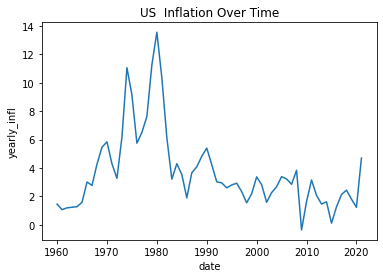

In [90]:
sns.lineplot(x = "date", y = "yearly_infl",
             data = inflation,markers = True).set(title='US  Inflation Over Time')

In [91]:
#inflation = df

## 2.9 GDP

In [92]:
gdp = pd.read_csv("GDP.csv")
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [93]:
gdp = gdp.rename(columns = {'DATE':'date','GDP':'gdp_period'})

In [94]:
gdp.dtypes

date           object
gdp_period    float64
dtype: object

In [95]:
gdp.date = pd.to_datetime(gdp.date)

[Text(0.5, 1.0, 'US  Inflation Over Time')]

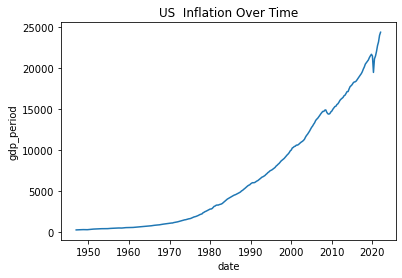

In [96]:
sns.lineplot(x = "date", y = "gdp_period",
             data = gdp,markers = True).set(title='US  Inflation Over Time')

In [97]:
#gdp = df

## 2.10 H1N1

In [98]:
h1n1 = pd.read_excel("h1n1_cum_deaths.xlsx")
#h1n1 = h1n1.rename(columns ={"US H1N1 Thousand Deaths":"h1n1_deaths_1000","Month/Year":"date"})

In [99]:
h1n1.head()

,Date,Cumulative Deaths
0,2009-04-12,0.0
1,2009-04-13,NaN
2,2009-04-14,NaN
3,2009-04-15,NaN
4,2009-04-16,NaN


In [100]:
h1n1 = h1n1.rename(columns = {'Date':'date','Cumulative Deaths':'h1n1_deaths'})

In [101]:
h1n1

,date,h1n1_deaths
0,2009-04-12,0.0
1,2009-04-13,NaN
2,2009-04-14,NaN
3,2009-04-15,NaN
4,2009-04-16,NaN
...,...,...
359,2010-04-06,NaN
360,2010-04-07,NaN
361,2010-04-08,NaN
362,2010-04-09,NaN


In [102]:
h1n1 = resample(h1n1,'date','M')

## 2.11 COVID

In [103]:
covid = pd.read_csv("covid.csv")

In [104]:
covid

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
885,2022-06-24,86833864,1012317
886,2022-06-25,86881533,1012480
887,2022-06-26,86899773,1012486
888,2022-06-27,87031752,1012765


In [105]:
covid = covid.drop(columns = ['cases'])
covid = covid.rename(columns = {'deaths':'covid_deaths'})

In [106]:
covid.dtypes

date            object
covid_deaths     int64
dtype: object

In [107]:
covid.date = pd.to_datetime(covid.date)

In [108]:
covid = resample(covid,'date','M')

# 3. Merging
<hr>

I will now prepare all of the dataframes for merging. This will require me to resample each dataframe that hasn't been so already to create an identical column(date) to merge on. 

In [109]:
population = resample(population,'date','M')
population.head()

,date,us_pop
0,1900-07-31,76090000.0
1,1900-08-31,76090000.0
2,1900-09-30,76090000.0
3,1900-10-31,76090000.0
4,1900-11-30,76090000.0


In [110]:
alc_d = resample(alc_d,'date','M')
alc_d.head()

,date,alcohol_deaths
0,1999-01-31,1783.0
1,1999-02-28,1609.0
2,1999-03-31,1723.0
3,1999-04-30,1507.0
4,1999-05-31,1583.0


In [111]:
alc_s = resample(alc_s,'date','M')
alc_s.head()

,date,alcohol_sales
0,1992-01-31,3459
1,1992-02-29,3458
2,1992-03-31,4002
3,1992-04-30,4564
4,1992-05-31,4221


In [112]:
drug_d = resample(drug_d,'date','M')
drug_d.head()

,date,drug_deaths
0,1999-01-31,1592.0
1,1999-02-28,1542.0
2,1999-03-31,1559.0
3,1999-04-30,1667.0
4,1999-05-31,1606.0


In [113]:
hom = resample(hom,'date','M')
hom.head()

,date,homicides
0,2006-01-31,1555.0
1,2006-02-28,1223.0
2,2006-03-31,1356.0
3,2006-04-30,1526.0
4,2006-05-31,1603.0


In [114]:
unemp = resample(unemp,'date','M')
unemp.head()

,date,perc_unemp
0,2002-05-31,5.8
1,2002-06-30,5.8
2,2002-07-31,5.8
3,2002-08-31,5.7
4,2002-09-30,5.7


In [115]:
inflation = resample(inflation,'date','M')
inflation.head()

,date,yearly_infl
0,1960-01-31,1.457976
1,1960-02-29,1.457976
2,1960-03-31,1.457976
3,1960-04-30,1.457976
4,1960-05-31,1.457976


In [116]:
gdp = resample(gdp,'date','M')
gdp.head()

,date,gdp_period
0,1947-01-31,243.164
1,1947-02-28,243.164
2,1947-03-31,243.164
3,1947-04-30,245.968
4,1947-05-31,245.968


In [117]:
sui = resample(sui,'date','M')
sui.head()

,date,suicide_deaths
0,1999-01-31,2498.0
1,1999-02-28,2296.0
2,1999-03-31,2465.0
3,1999-04-30,2475.0
4,1999-05-31,2542.0


In [118]:
dataframes = [population, alc_d ,alc_s ,drug_d, hom, unemp,sui,h1n1,covid,gdp,inflation]

Before merging you want to create a list of all the dataframes that you want ot combine. My list is shown above. 

In [119]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), dataframes)

This the function that I used to merge all of my dataframes. I did not write this code myself, I simply adapted from code I found on the page linked below. Borrowing code is a very common occurence in the computing world; however, you should know what the code means if you want to use it properly. 

The function above is merging all of the dataframes on the 'date' column through an **outer** join. I chose to use an outer join, opposed to an inner join, because I wanted to keep all valid data points from each dataframe regardless of their asscociation to the other dataframes. The results of this method can be seen in the Seaborn heatmap below. 
https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [120]:
df_merged

,date,us_pop,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths,gdp_period,yearly_infl
0,1900-07-31,76090000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-08-31,76090000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-09-30,76090000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900-10-31,76090000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1900-11-30,76090000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2022-02-28,332470000.0,NaN,13333.0,NaN,NaN,3.8,NaN,NaN,948855.0,NaN,NaN
1460,2022-03-31,332540000.0,NaN,16165.0,NaN,NaN,3.6,NaN,NaN,979236.0,NaN,NaN
1461,2022-04-30,332600000.0,NaN,15561.0,NaN,NaN,3.6,NaN,NaN,992010.0,NaN,NaN
1462,2022-05-31,332640000.0,NaN,NaN,NaN,NaN,3.6,NaN,NaN,1003571.0,NaN,NaN


<AxesSubplot:>

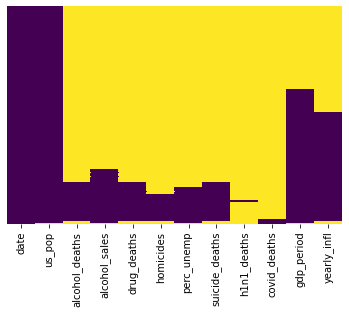

In [121]:
sns.heatmap(df_merged.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This join succesfully incorporated the different data points from each dataframe; however, many null values were created durin this process. I do not want to keep the nulls in my dataframe but I can't drop them as they are very dispersed in my data. I will trim the bottom of the data set up to they year 2000 and see if that solves my problem.

In [122]:
mask = (df_merged['date'] > '2000-01-01')
mask

0       False
1       False
2       False
3       False
4       False
        ...  
1459     True
1460     True
1461     True
1462     True
1463     True
Name: date, Length: 1464, dtype: bool

To do this, I created a mask list. This means that I create a boolean list(values of true or false) that show whether the data point has a date before or after the year 2000; if it does the value will return true, if not the value will return false. 

In [123]:
df_merged = df_merged.loc[mask]

I now set my dataframe equal to the loc(or indexes) that have true values. If you found this process confusing, trust me, thats okay. If you are trying to do somethinfg similar just try following my code exactly and it should work for you. 

<AxesSubplot:>

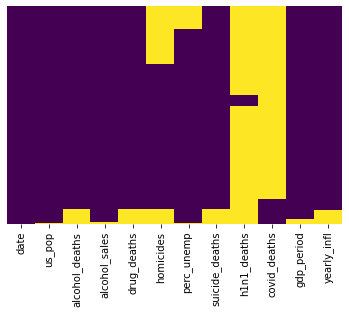

In [124]:
sns.heatmap(df_merged.isnull(),yticklabels=False,cbar=False,cmap='viridis')

That trim helped a lot! It seems that the alcohol deaths, drug deaths, homicides, suicides, and yearly iflation datasets all end at the same point. Since these facrtors are later going to be used in relation to the covid pandemic, replacing all nan with 0 would negatively affect the correlation we will try to estimate fro this reason i will drop all of the nan factors at the end of the dataset in line with yearly_infl. This is because inflation does not have any null values earlier in the dataset. Operating with this logic I could also reasonably drop based on suicide or alcohol deaths. 

In [125]:
df_merged = df_merged.dropna(subset=['alcohol_deaths'])  

<AxesSubplot:>

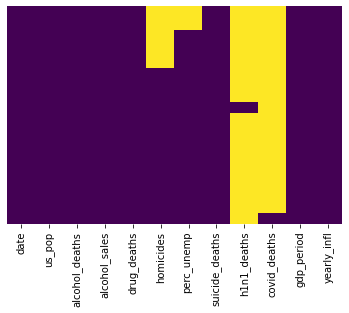

In [126]:
sns.heatmap(df_merged.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [127]:
df_merged = df_merged.fillna(0)

The dataframe appears to be as filled out as it can, but since there are so few insstances of h1n1 deaths,or pandemic deaths, I chose to fill the null values with 0 instead of dropping them. THis will help preserve the most complete dataframe I could form. 

In [128]:
df_merged

,date,us_pop,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths,gdp_period,yearly_infl
1194,2000-01-31,280730000.0,1868.0,4243.0,1773.0,0.0,0.0,2592.0,0.0,0.0,10002.179,3.376857
1195,2000-02-29,280940000.0,1641.0,4952.0,1658.0,0.0,0.0,2338.0,0.0,0.0,10002.179,3.376857
1196,2000-03-31,281160000.0,1626.0,6008.0,1715.0,0.0,0.0,2520.0,0.0,0.0,10002.179,3.376857
1197,2000-04-30,281420000.0,1556.0,5353.0,1765.0,0.0,0.0,2483.0,0.0,0.0,10247.720,3.376857
1198,2000-05-31,281640000.0,1588.0,6435.0,1821.0,0.0,0.0,2622.0,0.0,0.0,10247.720,3.376857
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2020-08-31,331560000.0,4362.0,15281.0,8593.0,2326.0,8.4,4040.0,0.0,183472.0,21138.574,1.233584
1442,2020-09-30,331630000.0,4226.0,15506.0,7786.0,2162.0,7.9,3908.0,0.0,206852.0,21138.574,1.233584
1443,2020-10-31,331700000.0,4359.0,16188.0,7713.0,2348.0,6.9,3781.0,0.0,230512.0,21477.597,1.233584
1444,2020-11-30,331750000.0,4427.0,14946.0,7649.0,2222.0,6.7,3704.0,0.0,268031.0,21477.597,1.233584


Since the dataframe seems to be at the best I can get it to I can go ahead and fill the rest of the null values with 0. 

In [129]:
df_merged

,date,us_pop,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths,gdp_period,yearly_infl
1194,2000-01-31,280730000.0,1868.0,4243.0,1773.0,0.0,0.0,2592.0,0.0,0.0,10002.179,3.376857
1195,2000-02-29,280940000.0,1641.0,4952.0,1658.0,0.0,0.0,2338.0,0.0,0.0,10002.179,3.376857
1196,2000-03-31,281160000.0,1626.0,6008.0,1715.0,0.0,0.0,2520.0,0.0,0.0,10002.179,3.376857
1197,2000-04-30,281420000.0,1556.0,5353.0,1765.0,0.0,0.0,2483.0,0.0,0.0,10247.720,3.376857
1198,2000-05-31,281640000.0,1588.0,6435.0,1821.0,0.0,0.0,2622.0,0.0,0.0,10247.720,3.376857
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2020-08-31,331560000.0,4362.0,15281.0,8593.0,2326.0,8.4,4040.0,0.0,183472.0,21138.574,1.233584
1442,2020-09-30,331630000.0,4226.0,15506.0,7786.0,2162.0,7.9,3908.0,0.0,206852.0,21138.574,1.233584
1443,2020-10-31,331700000.0,4359.0,16188.0,7713.0,2348.0,6.9,3781.0,0.0,230512.0,21477.597,1.233584
1444,2020-11-30,331750000.0,4427.0,14946.0,7649.0,2222.0,6.7,3704.0,0.0,268031.0,21477.597,1.233584


After merging I can see that each column is represented data in different ways. "perc_unemp" and "sui" represent rates per 100,000 while the other columns represented total values. To fix this I am going to perform some arithmetic. 

In [130]:
df_merged[['alcohol_deaths','alcohol_sales','drug_deaths','homicides','h1n1_deaths','covid_deaths','gdp_period','yearly_infl','suicide_deaths']] = 100000*(df_merged[['alcohol_deaths','alcohol_sales','drug_deaths','homicides','h1n1_deaths','covid_deaths','gdp_period','yearly_infl','suicide_deaths']].div(df_merged.us_pop, axis=0))

The above formula converts each column to rate per 100,000 (besides the ones already in that format). This is done by dividing each column by the corresponding value for "us_pop" then multiplying by 100,000. 
https://stackoverflow.com/questions/34540567/divide-multiple-columns-by-another-column-in-pandas

In [131]:
df_merged.head()

,date,us_pop,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths,gdp_period,yearly_infl
1194,2000-01-31,280730000.0,0.665408,1.511417,0.631568,0.0,0.0,0.923307,0.0,0.0,3.562918,0.001203
1195,2000-02-29,280940000.0,0.584110,1.762654,0.590162,0.0,0.0,0.832206,0.0,0.0,3.560255,0.001202
1196,2000-03-31,281160000.0,0.578318,2.136862,0.609973,0.0,0.0,0.896287,0.0,0.0,3.557469,0.001201
1197,2000-04-30,281420000.0,0.552910,1.902139,0.627176,0.0,0.0,0.882311,0.0,0.0,3.641433,0.001200
1198,2000-05-31,281640000.0,0.563840,2.284832,0.646570,0.0,0.0,0.930976,0.0,0.0,3.638588,0.001199


In [132]:
df_merged.describe()

,us_pop,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths,gdp_period,yearly_infl
count,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,3.078977e+08,0.748492,3.089993,1.239032,0.341695,5.480556,1.038086,0.104870,2.019956,5.008284,0.000700
std,1.495364e+07,0.174769,0.721880,0.466970,0.223510,2.715086,0.130518,0.602262,11.492530,0.864568,0.000358
min,2.807300e+08,0.532032,1.511417,0.505372,0.000000,0.000000,0.784293,0.000000,0.000000,3.557469,-0.000116
25%,2.947250e+08,0.613701,2.485569,0.923325,0.000000,4.400000,0.930433,0.000000,0.000000,4.367333,0.000509
50%,3.092200e+08,0.698647,3.062284,1.115141,0.443680,5.400000,1.018404,0.000000,0.000000,4.895671,0.000660
75%,3.211375e+08,0.865582,3.592220,1.480669,0.497302,7.200000,1.132105,0.000000,0.000000,5.702889,0.000994
max,3.317500e+08,1.399548,4.923888,2.940680,0.726395,14.700000,1.340765,4.038412,104.310475,6.599275,0.001268


The describe method will provide summary statistics for each column of your dataframe. This is great for data exploration, use this method to determeine if your data is to your liking or if you need to clean more. In my case, the data looks good! 

In [133]:
df_merged.corr()

,us_pop,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths,gdp_period,yearly_infl
us_pop,1.000000,0.872398,0.855837,0.912205,0.813831,0.384361,0.856993,0.003092,0.279993,0.981888,-0.536419
alcohol_deaths,0.872398,1.000000,0.797358,0.945271,0.643833,0.192005,0.739877,-0.061280,0.576005,0.878229,-0.458949
alcohol_sales,0.855837,0.797358,1.000000,0.823369,0.718512,0.295459,0.755424,-0.054427,0.386820,0.853760,-0.421153
drug_deaths,0.912205,0.945271,0.823369,1.000000,0.715119,0.251731,0.799104,-0.057400,0.461230,0.921489,-0.432672
homicides,0.813831,0.643833,0.718512,0.715119,1.000000,0.444478,0.676150,0.064509,0.261296,0.794969,-0.383620
perc_unemp,0.384361,0.192005,0.295459,0.251731,0.444478,1.000000,0.208767,0.282431,0.189666,0.253814,-0.406330
suicide_deaths,0.856993,0.739877,0.755424,0.799104,0.676150,0.208767,1.000000,-0.073000,0.147047,0.853731,-0.462661
h1n1_deaths,0.003092,-0.061280,-0.054427,-0.057400,0.064509,0.282431,-0.073000,1.000000,-0.030727,-0.045446,-0.208535
covid_deaths,0.279993,0.576005,0.386820,0.461230,0.261296,0.189666,0.147047,-0.030727,1.000000,0.271403,-0.161370
gdp_period,0.981888,0.878229,0.853760,0.921489,0.794969,0.253814,0.853731,-0.045446,0.271403,1.000000,-0.452648


The ".corr()" method shows the correlation between each column. In statistics correlation "normally refers to the degree to which a pair of variables are linearly related"(https://en.wikipedia.org/wiki/Correlation). Correlation is alwats given as a measure between -1 and 1. A negative correlation means that the two varibales have an inverse relationship, if one goes up it is likely the other will go down. An 

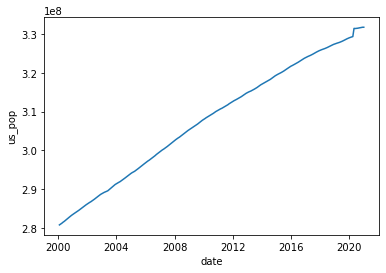

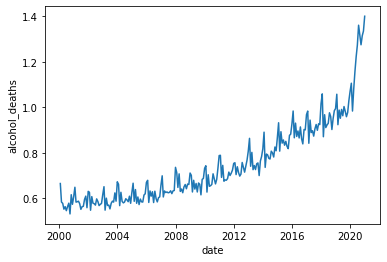

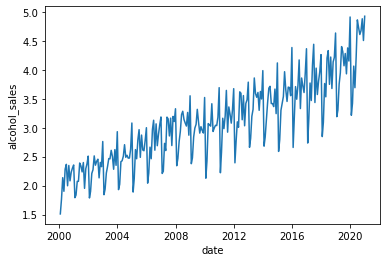

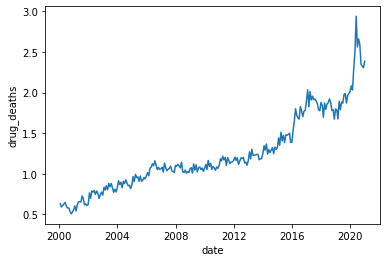

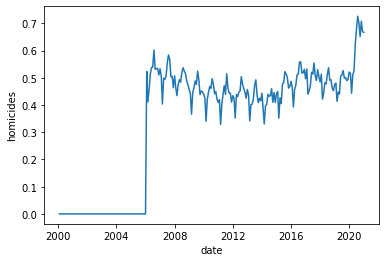

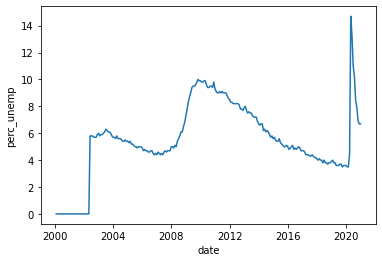

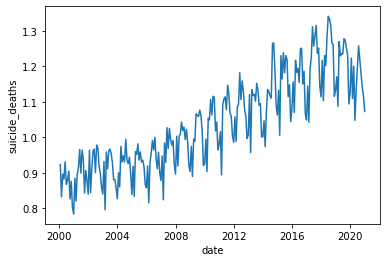

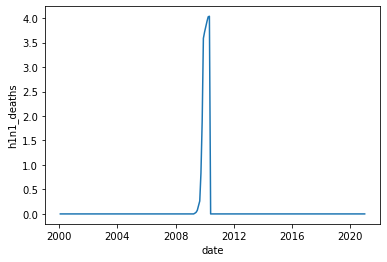

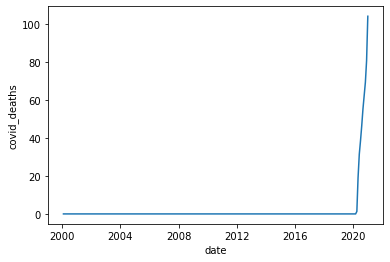

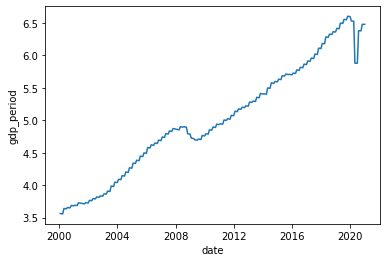

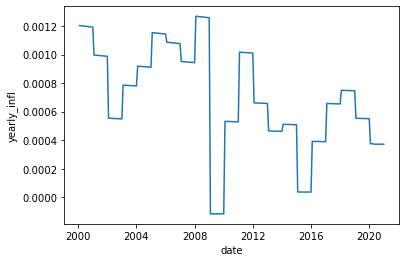

In [134]:
def make_charts(dataframe):
    for x in dataframe:
        if not x == 'date':
            sns.lineplot( x = "date", y = x, data = dataframe,markers = True)
            plt.show()
make_charts(df_merged)

The function that produced these charts introduces a concept you have not seen before: nested loops. The funciton I wrote uses a for loop to iterate the through the dataframe; however, before exectuing any commands on the data, I filter the input with an "if not" statement. If any data passed to the if statement is true(i.e x is equal to date) the command with in the for loop will notbe excuted and the next element in the series will be read in. 

In [135]:
#make_charts(df_merged)

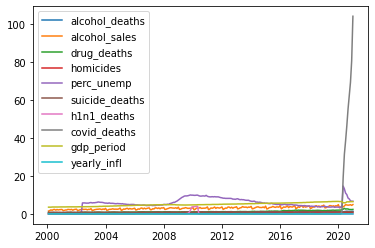

In [136]:
for col in df_merged.columns:
    if not col == 'date' and not col == 'us_pop':
        plt.plot(df_merged['date'], df_merged[col], label=col)
plt.legend()
plt.show()

The above plots show the change of data over time in respect to US population; however, the differing scales make it hard to plot all of the data on the same chart. To solve this we can normalize the data. Normalizing the data will aslo prepare us run more machine learning methods on the data that might increase our knowledge of the data. 

In [137]:
#pop_test = test.copy()

df_merged.to_csv("merged_data.csv", index = False)

I am saving my dataframe to the directory where this Jupyter Notebook is saved! 